In [16]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt; import numpy as np

In [17]:
def impHistoria(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy']); plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy'); plt.ylabel('accuracy'); plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left'); plt.show()
    plt.plot(history.history['loss']); plt.plot(history.history['val_loss'])
    plt.title('model loss'); plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left'); plt.show()

In [18]:
batch_size = 100; num_classes = 10; epochs = 30
nl, nc = 32,32; input_shape = (nl, nc, 3)
from keras.datasets import fashion_mnist
(ax, ay), (qx, qy) = fashion_mnist.load_data()
ax = ax.astype('float32'); ax /= 255 #0 a 1
qx = qx.astype('float32'); qx /= 255 #0 a 1
ay = keras.utils.to_categorical(ay, num_classes)
qy = keras.utils.to_categorical(qy, num_classes)

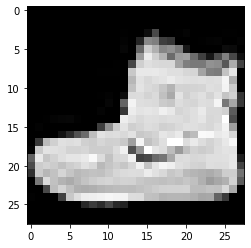

In [19]:
imgplot = plt.imshow(ax[0], cmap='gray')
plt.show()

In [20]:
from PIL import Image
n = ax.shape[0]
new_ax = np.ndarray((n, 32, 32))
for i in range(n):
    image = Image.fromarray(ax[i])
    new_ax[i] = image.resize((32,32))

n = qx.shape[0]
new_qx = np.ndarray((n, 32, 32))
for i in range(n):
    image2 = Image.fromarray(qx[i])
    new_qx[i] = image2.resize((32,32))

In [21]:
from keras import backend as K
def grayscale_to_rgb(images, channel_axis=-1):
    images= K.expand_dims(images, axis=channel_axis)
    tiling = [1] * 4    # 4 dimensions: B, H, W, C
    tiling[channel_axis] *= 3
    images= K.tile(images, tiling)
    return images

In [22]:
final_ax = grayscale_to_rgb(new_ax)
final_qx = grayscale_to_rgb(new_qx)

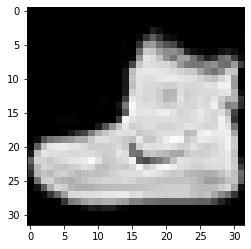

In [23]:
imgplot = plt.imshow(final_ax[0], cmap='gray')
plt.show()

In [24]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #20x16x16x3
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #40x8x8x3
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #80x4x4x3
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x4x4x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x4x4x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x4x4x3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #160x2x2x3
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x2x2x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x2x2x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')) #160x2x2x3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #160x1x1x3
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation='softmax'))

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='vgg3.png', show_shapes=True); model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)      

In [26]:
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=False, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(final_ax)

Epoch 1/30
600/600 - 40s - loss: 0.7529 - accuracy: 0.7160 - val_loss: 0.5856 - val_accuracy: 0.7864 - 40s/epoch - 66ms/step
Epoch 2/30
600/600 - 38s - loss: 0.4956 - accuracy: 0.8153 - val_loss: 0.4318 - val_accuracy: 0.8474 - 38s/epoch - 64ms/step
Epoch 3/30
600/600 - 38s - loss: 0.4132 - accuracy: 0.8474 - val_loss: 0.4899 - val_accuracy: 0.8440 - 38s/epoch - 63ms/step
Epoch 4/30
600/600 - 38s - loss: 0.3683 - accuracy: 0.8660 - val_loss: 0.3607 - val_accuracy: 0.8763 - 38s/epoch - 63ms/step
Epoch 5/30
600/600 - 38s - loss: 0.3426 - accuracy: 0.8744 - val_loss: 0.4377 - val_accuracy: 0.8625 - 38s/epoch - 63ms/step
Epoch 6/30
600/600 - 38s - loss: 0.3230 - accuracy: 0.8838 - val_loss: 0.3205 - val_accuracy: 0.8889 - 38s/epoch - 63ms/step
Epoch 7/30
600/600 - 38s - loss: 0.3094 - accuracy: 0.8874 - val_loss: 0.3038 - val_accuracy: 0.8963 - 38s/epoch - 63ms/step
Epoch 8/30
600/600 - 38s - loss: 0.2963 - accuracy: 0.8920 - val_loss: 0.3409 - val_accuracy: 0.8798 - 38s/epoch - 63ms/step


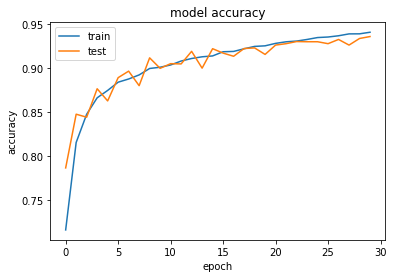

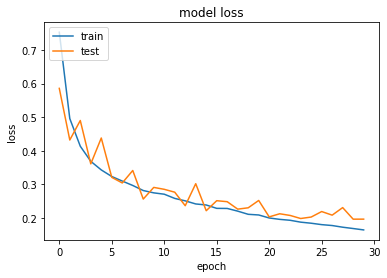

In [27]:
opt=optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(datagen.flow(final_ax,ay,batch_size=batch_size), steps_per_epoch=ax.shape[0]//batch_size,
    epochs=epochs, verbose=2, validation_data=(final_qx, qy))
impHistoria(history)

In [28]:
score = model.evaluate(final_qx, qy, verbose=0)
print('Test loss:', score[0]); print('Test accuracy:', score[1])
model.save('vgg3.h5')

Test loss: 0.1959449052810669
Test accuracy: 0.9355999827384949
